In [1]:
import pandas as pd
import numpy as np

from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn import svm

import itertools

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

import seaborn

%matplotlib inline

## Data recuperation

In [2]:
data = pd.read_csv("C:/Users/ind06/Downloads/creditcard/creditcard.csv")
df = pd.DataFrame(data) # converting data to pandas dataframe

## Data Visualization

In [3]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


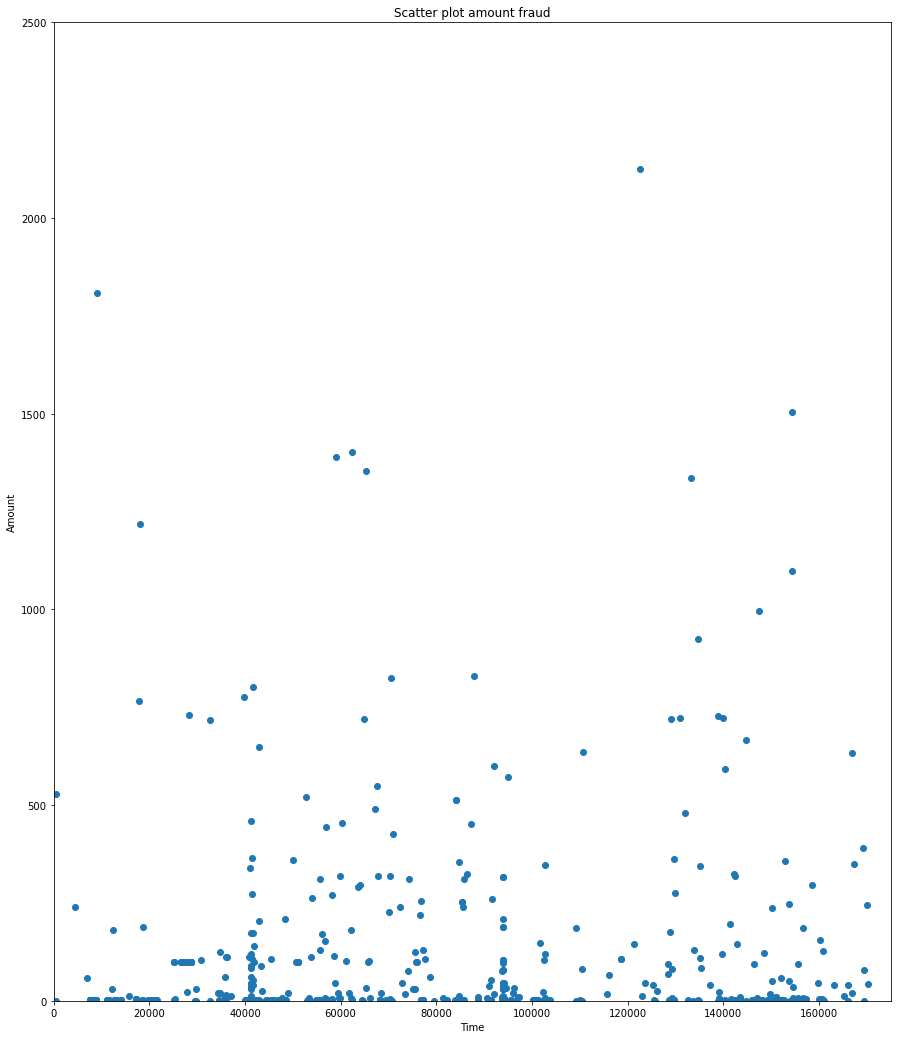

In [4]:
df_fraud = df[df['Class']==1]
plt.figure(figsize=(15, 18))
plt.scatter(df_fraud['Time'], df_fraud['Amount'])
plt.title('Scatter plot amount fraud')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.xlim([0, 175000])
plt.ylim([0, 2500])
plt.show()

The time doesn't impact the frequency of frauds. Moreover, the majority of frauds are small amounts.

In [6]:
nb_big_fraud = df_fraud[df_fraud['Amount']>1000].shape[0]
print('There are only '+str(nb_big_fraud)+' frauds where the amount was bigger than 1000 over '+str(df_fraud.shape[0])+' frauds')

There are only 9 frauds where the amount was bigger than 1000 over 492 frauds


In [7]:
number_fraud = len(data[data.Class==1])
number_no_fraud = len(data[data.Class==0])
print('There are only '+str(number_fraud)+' frauds in the original dataset, eve though there are '+str(number_no_fraud)+' no frauds in the dataset.')

There are only 492 frauds in the original dataset, eve though there are 284315 no frauds in the dataset.


This dataset in unbalanced which means using the data as it is might result in unwanted behavior from a supervised classifier.

In [8]:
# 모두 non-fraud로 예측할 경우
print("The accuracy of the classifier then would be : "+str((284315-492)/284315)+' which is the number of tgood classification over the number of tuple of classify')

The accuracy of the classifier then would be : 0.998269524998681 which is the number of tgood classification over the number of tuple of classify


To answer this problem we could use the oversampling principle or the undersampling principle. The undersampling principle should be used only if we can be sure that the selected few tuples (in this case non-fraud) are representative of the whole non-fraud transactions of the dataset.

## Correlation of features

In [9]:
df_corr = df.corr()

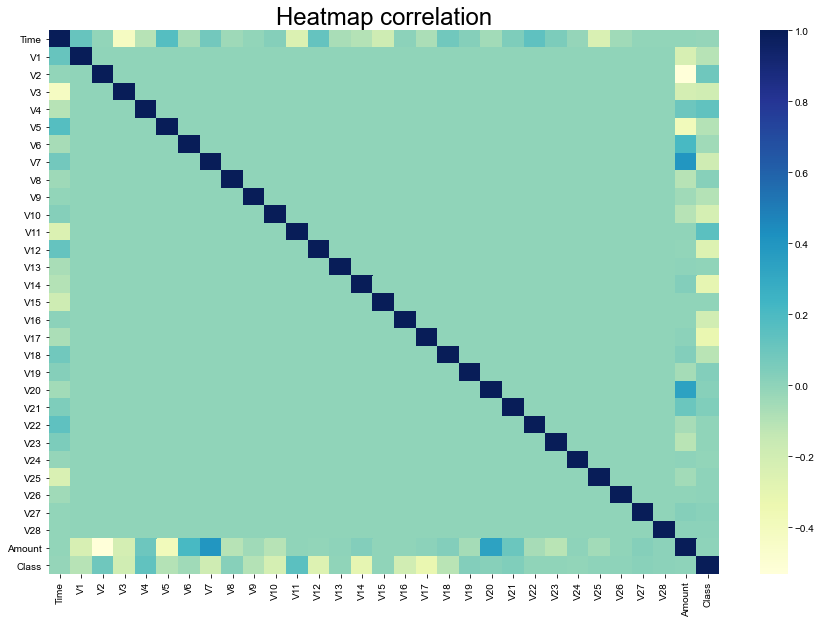

In [10]:
plt.figure(figsize=(15,10))
seaborn.heatmap(df_corr, cmap="YlGnBu")
seaborn.set(font_scale=2, style="white")

plt.title("Heatmap correlation")
plt.show()

As we can notice, most of the features are not correlated with each other. This corroborates the fact that a PCA was previously performed on the data.

What can generally be done on a massive dataset is a dimension reduction. By picking the emost important dimensions, there is a possibility of explaining most of the problem, thus gaining a considerable amount of time while preventing the accuracy to drop too much.

However in this case given the fact a PCA was previously performed, if the dimension reduction is effective than the PCA wasn't conputed in the most effective way. Another way to put it is that no dimension reduction should be computed on a dataset on which a PCA was computed correctly.

In [11]:
rank = df_corr['Class']
df_rank = pd.DataFrame(rank)
df_rank = np.abs(df_rank).sort_values(by='Class', ascending=False)

df_rank.dropna(inplace=True)

In [12]:
df_rank

,Class
Class,1.000000
V17,0.326481
V14,0.302544
V12,0.260593
V10,0.216883
V16,0.196539
V3,0.192961
V7,0.187257
V11,0.154876
V4,0.133447


## Data Selection

* Oversampling

one way to do oversampling is to replicate the under-represented class tuples until we attain a correct proportion between the class

However as we haven't infinite time nor the patience, we are going to run the classifier with the undersampled training data (for those using the undersampling principle if results are really bad just rerun the training dataset definition)

* undersampling

In [13]:
# we separate our data in two groups : a train dataset / test dataset

# first we build our train dataset
df_train_all = df[0:150000] # we cut in two the original dataset
df_train_1 = df_train_all[df_train_all['Class']==1]
df_train_0 = df_train_all[df_train_all['Class']==0]
print('In this dataset, we have '+str(len(df_train_1))+' frauds so we need to take a similar number of non-fraud')

In this dataset, we have 293 frauds so we need to take a similar number of non-fraud


In [14]:
df_sample = df_train_0.sample(300)
df_train = df_train_1.append(df_sample)
df_train = df_train.sample(frac=1) # then we mix our dataset

In [15]:
X_train = df_train.drop(['Time', 'Class'], axis=1) # we drop the freatures Time(useless), and the Class(label)
y_train = df_train['Class']
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)

In [16]:
df_test_all=df[150000:]

X_test_all = df_test_all.drop(['Time', 'Class'], axis=1)
y_test_all = df_test_all['Class']
X_test_all = np.asarray(X_test_all)
y_test_all = np.asarray(y_test_all)

In [17]:
X_train_rank = df_train[df_rank.index[1:11]]
X_train_rank = np.asarray(X_train_rank)

In [18]:
X_test_all_rank = df_test_all[df_rank.index[1:11]]
X_test_all_rank = np.asarray(X_test_all_rank)
y_test_all = np.asarray(y_test_all)

## Confusion Matrix

In [19]:
class_names = np.array(['0', '1']) # binary label, class=1 (fraud) and class=0 (no fraud)

In [20]:
# function to plot the confusion matrix
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation="nearest", cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i,j]>thresh else "black")
        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')

## Model Selection

In [21]:
classifier = svm.SVC(kernel="linear")

In [22]:
classifier.fit(X_train, y_train)

SVC(kernel='linear')

## Testing the model

In [23]:
prediction_SVM_all = classifier.predict(X_test_all)

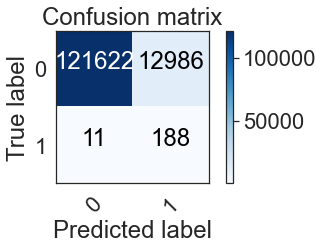

In [24]:
cm = confusion_matrix(y_test_all, prediction_SVM_all)
plot_confusion_matrix(cm, class_names)

In this case we are gonna try to minimize the number of errors in our prediction results. Errors are on the anti-diagonal of the confusion matrix. But we can infer that being wrong about an actual fraud is far worse than being worse about a non-fraud transation.

In [26]:
print('Our criterion give a result of '+str(((cm[0][0]+cm[1][1])/(sum(cm[0])+sum(cm[1]))+4*cm[1][1]/(cm[1][0]+cm[1][1]))/5))

Our criterion give a result of 0.9364965129936552


In [30]:
print('We have detected '+str(cm[1][1])+' fraud / '+str(cm[1][1]+cm[1][0])+' total frauds.')
print('\nSo, the probability to detect a fraud is '+str(cm[1][1]/(cm[1][1]+cm[1][0])))
print('the accuracy is : '+str((cm[0][0]+cm[1][1])/(sum(cm[0])+sum(cm[1]))))

We have detected 188 fraud / 199 total frauds.

So, the probability to detect a fraud is 0.9447236180904522
the accuracy is : 0.903588092606467


## Models Rank

In [32]:
classifier.fit(X_train_rank, y_train)
prediction_SVM = classifier.predict(X_test_all_rank)

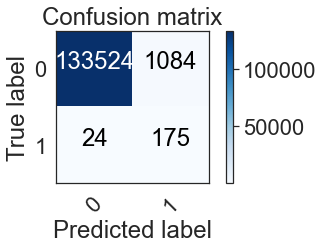

In [34]:
cm = confusion_matrix(y_test_all, prediction_SVM)
plot_confusion_matrix(cm, class_names)

In [35]:
print('Our criterion give a result of '+str(((cm[0][0]+cm[1][1])/(sum(cm[0])+sum(cm[1]))+4*cm[1][1]/(cm[1][0]+cm[1][1]))/5))

Our criterion give a result of 0.9018737563879246


In [36]:
print('We have detected '+str(cm[1][1])+' fraud / '+str(cm[1][1]+cm[1][0])+' total frauds.')
print('\nSo, the probability to detect a fraud is '+str(cm[1][1]/(cm[1][1]+cm[1][0])))
print('the accuracy is : '+str((cm[0][0]+cm[1][1])/(sum(cm[0])+sum(cm[1]))))

We have detected 175 fraud / 199 total frauds.

So, the probability to detect a fraud is 0.8793969849246231
the accuracy is : 0.99178084224113


## Re-balanced class weight

In this previously used SVM model, the weight of each class was the same, which means that missing a fraud is as bad as misjudging a non-fraud. The objective, for a bank, is to maximize the number of detected frauds! Even if it means considering more non-fraud tuple as fraudulent operation. So, we need to minimize the False positives : the number of no detected frauds.

Indeed, by modifying the class_weight parameter, we can choose which class to give more importance during the training phase.

In [37]:
classifier_b = svm.SVC(kernel="linear", class_weight={0:0.6, 1:0.4})

In [38]:
classifier_b.fit(X_train, y_train)

SVC(class_weight={0: 0.6, 1: 0.4}, kernel='linear')

## Testing the model

In [40]:
prediction_SVM_b_all = classifier_b.predict(X_test_all)

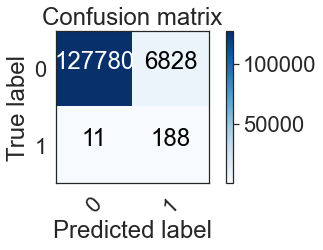

In [41]:
cm = confusion_matrix(y_test_all, prediction_SVM_b_all)
plot_confusion_matrix(cm,class_names)

In [42]:
print('Our criterion give a result of '+str(((cm[0][0]+cm[1][1])/(sum(cm[0])+sum(cm[1]))+4*cm[1][1]/(cm[1][0]+cm[1][1]))/5))

Our criterion give a result of 0.9456325370873595


In [43]:
print('We have detected '+str(cm[1][1])+' fraud / '+str(cm[1][1]+cm[1][0])+' total frauds.')
print('\nSo, the probability to detect a fraud is '+str(cm[1][1]/(cm[1][1]+cm[1][0])))
print('the accuracy is : '+str((cm[0][0]+cm[1][1])/(sum(cm[0])+sum(cm[1]))))

We have detected 188 fraud / 199 total frauds.

So, the probability to detect a fraud is 0.9447236180904522
the accuracy is : 0.9492682130749887


## Models Rank

In [44]:
classifier_b.fit(X_train_rank, y_train)
prediction_SVM = classifier_b.predict(X_test_all_rank)

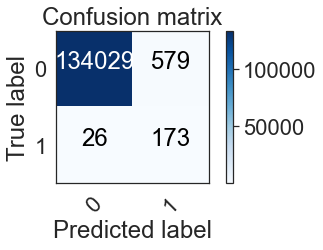

In [45]:
cm = confusion_matrix(y_test_all, prediction_SVM)
plot_confusion_matrix(cm,class_names)

In [46]:
print('Our criterion give a result of '+str(((cm[0][0]+cm[1][1])/(sum(cm[0])+sum(cm[1]))+4*cm[1][1]/(cm[1][0]+cm[1][1]))/5))

Our criterion give a result of 0.8945798074321253


In [47]:
print('We have detected '+str(cm[1][1])+' fraud / '+str(cm[1][1]+cm[1][0])+' total frauds.')
print('\nSo, the probability to detect a fraud is '+str(cm[1][1]/(cm[1][1]+cm[1][0])))
print('the accuracy is : '+str((cm[0][0]+cm[1][1])/(sum(cm[0])+sum(cm[1]))))

We have detected 173 fraud / 199 total frauds.

So, the probability to detect a fraud is 0.8693467336683417
the accuracy is : 0.9955121024872595
